In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper

import torch
import numpy as np

# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [20]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'1d_singlefunc_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)


# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = False
    
default_conf['multiple_functions']['experiment_params']

No GPU available, training on CPU


{'datagenerator': 'cnp.datageneration.PolynomialRegression',
 'dim_observation': 50,
 'dimout': 2,
 'dimr': 128,
 'dimx': 1,
 'dimy': 1,
 'dropout': 0,
 'lr': 0.0001,
 'max_contx': 10,
 'max_funcs': 10,
 'min_contx': 3,
 'min_funcs': 2,
 'n_epochs': 1000,
 'num_layers_decoder': 3,
 'num_layers_encoder': 4,
 'aggregation_kwargs': {'aggregator': 'AggrLSTM',
  'insize': 10,
  'dimout': 1,
  'num_layers': 2,
  'num_neurons': 128,
  'batch_first': True},
 'num_neurons_decoder': 128,
 'num_neurons_encoder': 128,
 'print_after': 100,
 'range_x': [-2, 2],
 'seed': 0,
 'train_on_gpu': False}

## Simple MLP aggregation

In [33]:
kwargs = default_conf['multiple_functions']['training_params']['kwargs']

In [34]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['multiple_functions']['experiment_params'])

  0%|          | 0/1000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         9.166
Mean Validation loss after 0 equals                     4.547

Validation loss for the function plotted:                 4.547


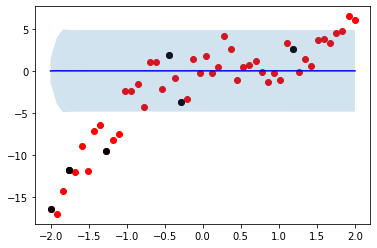

  0%|          | 2/1000 [00:13<1:54:27,  6.88s/it]


KeyboardInterrupt: 

In [35]:
state_dict_encoder, state_dict_decoder = trainer.run_training(batch_size_train=1,
             batch_size_vali=1,
             plotting=True,
             kwargs=kwargs)

## Simple RNN aggregation

In [9]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'1d_singlefunc_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)


# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['single_function']['experiment_params']['train_on_gpu'] = False
    
default_conf['multiple_functions']['experiment_params']

No GPU available, training on CPU


{'datagenerator': 'cnp.datageneration.PolynomialRegression',
 'dim_observation': 50,
 'dimout': 2,
 'dimr': 128,
 'dimx': 1,
 'dimy': 1,
 'dropout': 0,
 'lr': 0.0001,
 'max_contx': 10,
 'max_funcs': 10,
 'min_contx': 3,
 'min_funcs': 2,
 'n_epochs': 1000,
 'num_layers_aggr': 3,
 'num_layers_decoder': 3,
 'num_layers_encoder': 4,
 'num_neurons_aggr': 10,
 'num_neurons_decoder': 128,
 'num_neurons_encoder': 128,
 'print_after': 100,
 'range_x': [-2, 2],
 'seed': 0,
 'train_on_gpu': False}

In [10]:
kwargs = default_conf['multiple_functions']['training_params']['kwargs']

In [ ]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['multiple_functions']['experiment_params'])

In [ ]:
state_dict_encoder, state_dict_decoder = trainer.run_training(batch_size_train=1,
             batch_size_vali=1,
             plotting=True,
             kwargs=kwargs)